# Stroke prediciton

Stroke is ranked as the second leading cause of death and remains a huge public health burden despite the advancement in understanding of the disease. 

This dataset is used to identify insights about stroke predicitons based on the input parameters such as age, gender, smoking status, comorbidities.

### Importing necessary modules

In [1533]:
# importing modules necessary for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import data_summary


### Loading the Data


In [1534]:

stroke_df = pd.read_csv('data/stroke_data.csv')

### Data summary

To gain better understanding of the dataset, I created a concise summary of data included:

In [1535]:
data_summary(stroke_df)


,col_name,col_dtype,num_of_non_nulls,num_of_nulls,distinct_values_count,distinct_values
0,id,int64,5110,0,5110,"[9046, 51676, 31112, 60182, 1665, 56669, 53882..."
1,gender,object,5110,0,3,"[Male, Female, Other]"
2,age,float64,5110,0,104,"[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69...."
3,hypertension,int64,5110,0,2,"[0, 1]"
4,heart_disease,int64,5110,0,2,"[1, 0]"
5,ever_married,object,5110,0,2,"[Yes, No]"
6,work_type,object,5110,0,5,"[Private, Self-employed, Govt_job, children, N..."
7,Residence_type,object,5110,0,2,"[Urban, Rural]"
8,avg_glucose_level,float64,5110,0,3979,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2..."
9,bmi,float64,4909,201,418,"[36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8..."


To keep consistency in names of columns, I renamed 'Residence_type' column:

In [1536]:
stroke_df.rename(columns={'Residence_type': 'residence_type'}, inplace=True)

### Visualizing missing data

np.float64(3.93)

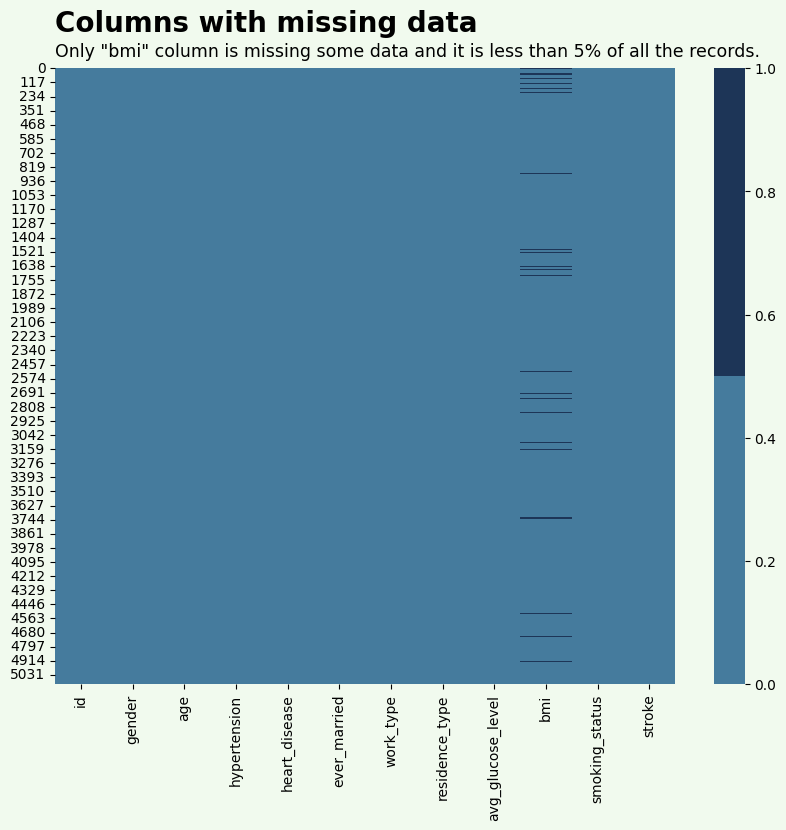

In [1537]:
# Create the plot
fig, ax = plt.subplots(figsize=(10,8))
# Add heatmap with custom colors
colours = ['#457B9D', '#1D3557']
ax = sns.heatmap(stroke_df.isnull(), cmap=sns.color_palette(colours))
# Title and subtitle
plt.text(x=0, y=1.06, s='Columns with missing data',
         fontsize=20, fontweight='bold', color='black', transform=ax.transAxes)
plt.text(x=0, y=1.02, s='Only "bmi" column is missing some data and it is less than 5% of all the records.',
         fontsize=12.5, color='black', transform=ax.transAxes)
# Background color
fig.patch.set_facecolor('#F1FAEE')
ax.set_facecolor('#F1FAEE')


# Calculate the percent of records with missing bmi value
missing_percentage = stroke_df['bmi'].isnull().mean() * 100
round(missing_percentage, 2)

### Data imbalance check

In [1538]:
# Check values distribution in 'stroke' column
stroke_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

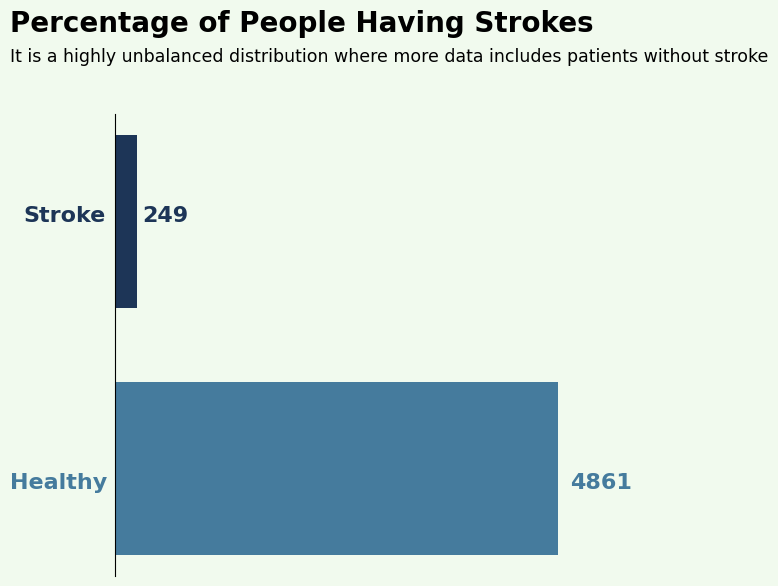

In [1539]:
stroke_count = stroke_df.groupby(['stroke'])['stroke'].count()
# Create the plot
fig, ax = plt.subplots(figsize=(6,6))
# Add bars
ax.barh([1], stroke_count[1], height=0.7, color='#1D3557')
ax.barh([0], stroke_count[0], height=0.7, color='#457B9D')
# Add annotations
plt.text(-1150, -0.08, 'Healthy', fontdict={'size': 16, 'weight': 'bold', 'color': '#457B9D'})
plt.text(-1000, 1, 'Stroke', fontdict={'size': 16, 'weight': 'bold', 'color': '#1D3557'})
# Percentage values
plt.text(5000, -0.08, '4861', fontdict={'size': 16, 'weight': 'bold', 'color': '#457B9D'})
plt.text(300, 1, '249', fontdict={'size': 16, 'weight': 'bold', 'color': '#1D3557'})
# Background color
fig.patch.set_facecolor('#F1FAEE')
ax.set_facecolor('#F1FAEE')
# Hiding axes and spines
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
for direction in ['top', 'right', 'bottom']:
    ax.spines[direction].set_visible(False)
# Add a title and additional description
plt.text(-1150, 1.77, 'Percentage of People Having Strokes',
         fontdict={'size': 20, 'weight': 'bold', 'color': 'black'})
plt.text(-1150, 1.65, 'It is a highly unbalanced distribution where more data includes patients without stroke',
         fontdict={'size': 12.5, 'color': 'black'})
# Show the plot
plt.show()


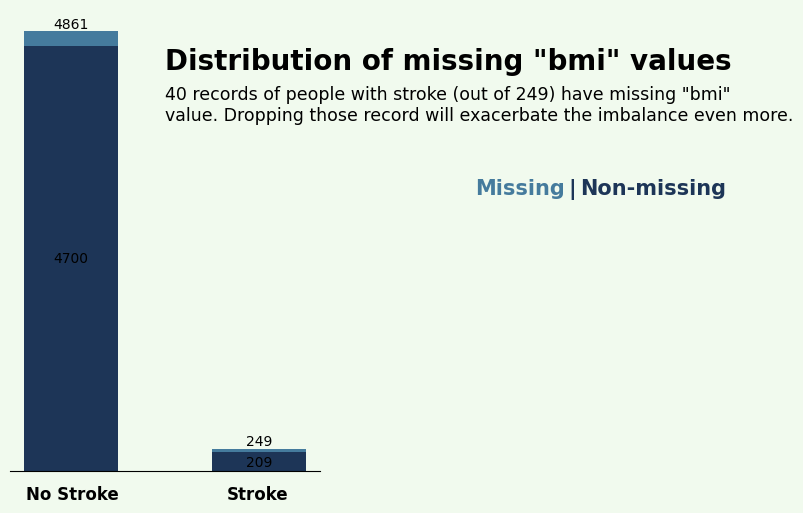

In [1540]:
# Calculate missing and non-missing BMI in stroke and no-stroke groups
missing_bmis = stroke_df[stroke_df['bmi'].isnull()]['stroke'].value_counts()
non_missing_bmis = stroke_df[stroke_df['bmi'].notnull()]['stroke'].value_counts()

# Align missing values' counts with categories
categories = ['no stroke', 'stroke']
missing_values = [missing_bmis.get(0, 0), missing_bmis.get(1, 0)]
non_missing_values = [non_missing_bmis.get(0, 0), non_missing_bmis.get(1, 0)]

# Plot
fig, ax = plt.subplots(figsize=(4,6))

# Stacked bar chart
p1 = ax.bar(categories, non_missing_values, width=0.5, color='#1D3557' )
p2 = ax.bar(categories, missing_values, width =0.5, bottom=non_missing_values, color='#457B9D' )

# Add labels
ax.bar_label(p1, label_type='center', fmt='%d')
ax.bar_label(p2, label_type='edge', fmt='%d')

# Add a title and additional description
plt.text(0.5, .87, 'Distribution of missing "bmi" values',
         fontdict={'size': 20, 'weight': 'bold', 'color': 'black'}, transform=ax.transAxes)
plt.text(0.5, 0.76, '40 records of people with stroke (out of 249) have missing "bmi"\nvalue. Dropping those record will exacerbate the imbalance even more.', fontdict={'size': 12.5, 'color': 'black'}, transform=ax.transAxes)
# Legend
plt.text(1.5, 0.6, 'Missing',
         fontdict={'size': 15, 'color': '#457B9D', 'weight':'bold'}, transform=ax.transAxes)
plt.text(1.8, 0.6, '|',
         fontdict={'size': 15, 'color': '#1D3557', 'weight':'bold'}, transform=ax.transAxes)
plt.text(1.84, 0.6, 'Non-missing',
         fontdict={'size': 15, 'color': '#1D3557', 'weight':'bold'}, transform=ax.transAxes)
# Add annotations instead of x-tick labels
ax.text(0.2, -0.03, 'No Stroke', ha='center', va='top', fontdict={'size': 12, 'weight': 'bold', 'color': 'black'}, transform=ax.transAxes)
ax.text(0.8, -0.03, 'Stroke', ha='center', va='top', fontdict={'size': 12, 'weight': 'bold', 'color': 'black'}, transform=ax.transAxes)
# Remove x-tick labels
ax.set_xticks([])
ax.set_xticklabels([])

# Background color
fig.patch.set_facecolor('#F1FAEE')
ax.set_facecolor('#F1FAEE')

# Hiding axes and spines
ax.axes.get_yaxis().set_visible(False)
for direction in ['top', 'right', 'left']:
    ax.spines[direction].set_visible(False)

plt.show()


### Handling missing values

Dropping patients with missing BMI records could significantly affect the minority class (stroke = 1). This will exacerbate the imbalance even more. Although 'bmi' is missing, other features might still provide valuable information for analysis. That is why I will fill the bmi with a median of this column

In [1541]:
# Handling missing values
stroke_df['bmi'] = stroke_df['bmi'].fillna(round(stroke_df['bmi'].median(), 2))
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Distribution of numerical variables

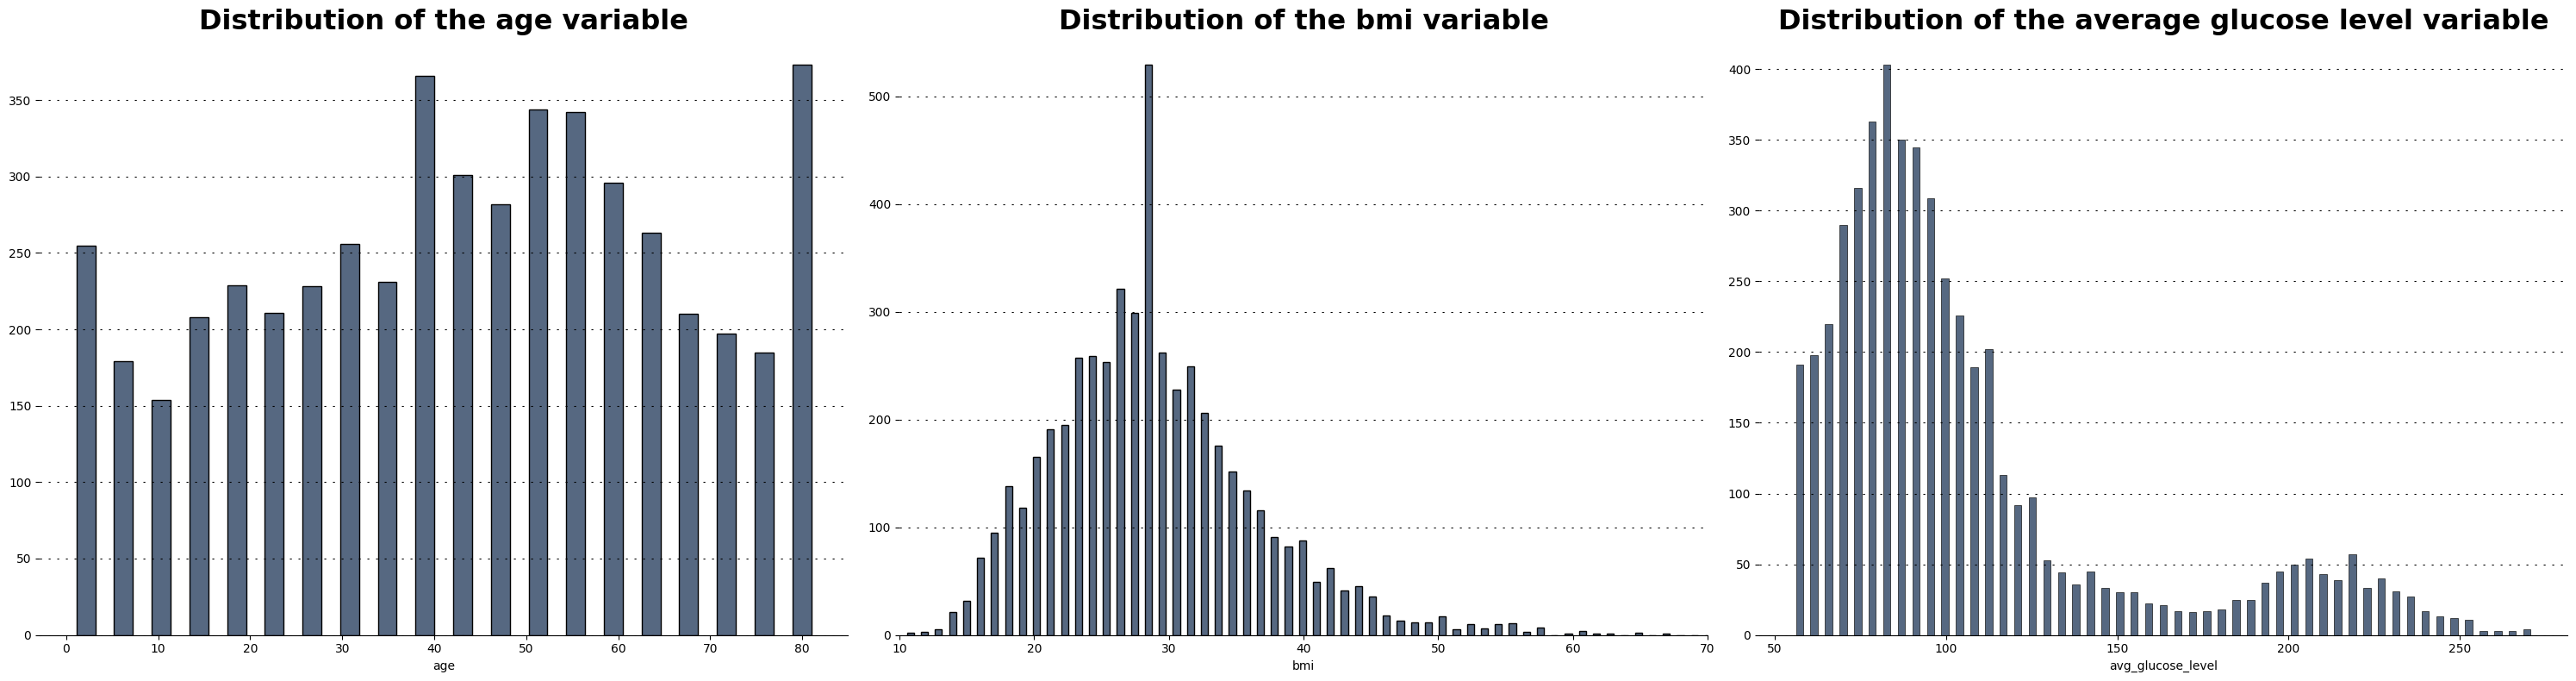

In [ ]:
# initialize figure with specified size and background color
fig = plt.figure(figsize=(30, 8), facecolor='white')

# Define grid layout (1 row, 3 columns) for subplots
gs = fig.add_gridspec(1, 3)

# Create placeholders for subplots
ax= [None for _ in range(3)] # list of 3 empty axes
ax[0] = fig.add_subplot(gs[0, 0])
ax[1] = fig.add_subplot(gs[0, 1])
ax[2] = fig.add_subplot(gs[0, 2])

# Add custom annotations to subplots
ax[0].set_title('Distribution of the age variable', fontsize=23,fontweight='bold')
ax[1].set_title('Distribution of the bmi variable', fontsize=23,fontweight='bold',)
ax[2].set_title('Distribution of the average glucose level variable', fontsize=23,fontweight='bold',)

# Plot data for 'age' variable using KDE plot
sns.histplot(x=stroke_df['age'], ax=ax[0], fill=True, color='#1D3557', linewidth=1, edgecolor='black', shrink=0.5)

# Plot data for 'bmi' variable using histogram
sns.histplot(x=stroke_df['bmi'], ax=ax[1], fill=True, color='#1D3557', linewidth=1, edgecolor='black', shrink=0.5)

# Plot data for 'avg_glucose' variable using histogram
sns.histplot(x=stroke_df['avg_glucose_level'], ax=ax[2], fill=True, color='#1D3557', edgecolor='black', shrink=0.5)

# Format all subplots
for _ in range(3):
    # Remove y-axis label
    ax[_].set_ylabel('')
    # Add grid to the y-axis
    ax[_].grid(
        which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    # Remove spines
    for direction in ['top', 'right', 'left']:
        ax[_].spines[direction].set_visible(False)

# Set custom x-axis limits
ax[1].set_xlim(10, 70)

# Adjust subplot spacing
plt.tight_layout()
